In [36]:
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras.layers import Dense

In [37]:
result = tf.config.list_physical_devices('GPU')
print(result)

[]


In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
train_images.shape

(60000, 28, 28)

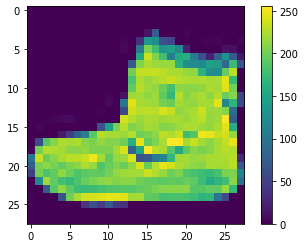

In [42]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:
train_images = train_images / 255.0
test_images = test_images / 255.0

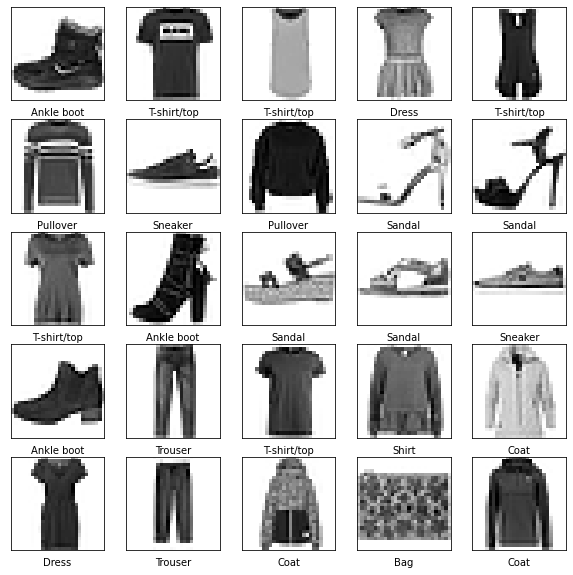

In [44]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [61]:
import numpy as np 
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [77]:
img_inputs = keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(img_inputs)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

my_model = keras.Model(inputs=img_inputs, outputs=x, name="my_model")
my_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# my_model.summary()

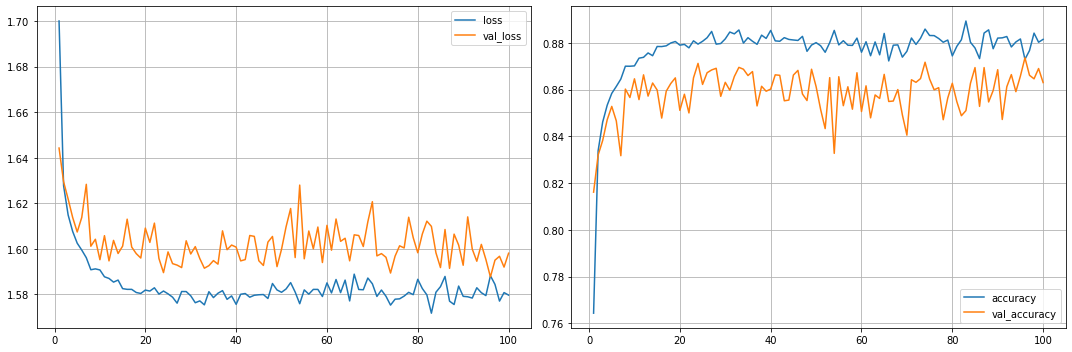

1875/1875 [==============================] - 3s 2ms/step - loss: 1.5797 - accuracy: 0.8815 - val_loss: 1.5981 - val_accuracy: 0.8630


In [78]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
plot_learning = PlotLearning()
callbacks_list = [plot_learning]

callbacks = []
my_model.fit(train_images, 
             train_labels, 
             epochs=100,
             shuffle=True,
             validation_data=(test_images, test_labels),
             callbacks=callbacks_list)

In [ ]:
img_inputs = keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(img_inputs)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

my_model = keras.Model(inputs=img_inputs, outputs=x, name="my_model")
my_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# my_model.summary()

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
plot_learning = PlotLearning()
callbacks_list = [plot_learning]

callbacks = []
my_model.fit(train_images, 
             train_labels, 
             epochs=100,
             shuffle=True,
             validation_data=(test_images, test_labels),
             callbacks=callbacks_list)